In [2]:
import pandas as pd
import scipy
import numpy as np

In [3]:
a = np.load('./preprocessed/collaborative_input/expertise.npy')
b = np.load('./preprocessed/collaborative_input/test_expertise.npy')

In [4]:
train_sample = pd.read_pickle('./preprocessed/collaborative_input/train_sample.pkl')

In [5]:
test_sample = pd.read_pickle('./preprocessed/collaborative_input/test_sample.pkl')

In [24]:
def calculate_percentage_star(df,star):
    return len(df.loc[df['overall']==star])/len(df)

In [28]:
print(f"The number of unique reviewers in train {len(train_sample['reviewerID'].unique())}")
print(f"The number of unique movies in train {len(train_sample['movieID'].unique())}")
print(f"The distribution of overall in train: 1 star {str(calculate_percentage_star(train_sample,1))}%")
print(f"The distribution of overall in train: 2 star {str(calculate_percentage_star(train_sample,2))}%")
print(f"The distribution of overall in train: 3 star {str(calculate_percentage_star(train_sample,3))}%")
print(f"The distribution of overall in train: 4 star {str(calculate_percentage_star(train_sample,4))}%")
print(f"The distribution of overall in train: 5 star {str(calculate_percentage_star(train_sample,5))}%")

The number of unique reviewers in train 25315
The number of unique movies in train 16988
The distribution of overall in train: 1 star 0.08827%
The distribution of overall in train: 2 star 0.06781%
The distribution of overall in train: 3 star 0.10624%
The distribution of overall in train: 4 star 0.21079%
The distribution of overall in train: 5 star 0.52689%


(0.0, 0.55)

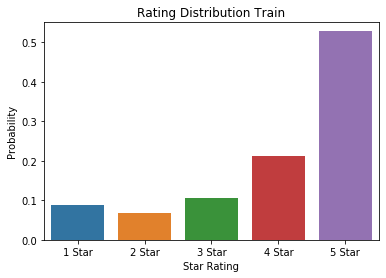

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
stars = ['1 Star','2 Star', '3 Star', '4 Star', '5 Star']
percentage = [calculate_percentage_star(train_sample,1),calculate_percentage_star(train_sample,2),calculate_percentage_star(train_sample,3),calculate_percentage_star(train_sample,4),calculate_percentage_star(train_sample,5)]
d = {'Star Rating':stars,'Probability':percentage}
star_df_train = pd.DataFrame(d)
star_df_train


sns.barplot(x='Star Rating', y='Probability',data=star_df_train)
plt.title('Train Rating Distribution')
plt.ylim(top=0.55)


(0.0, 0.55)

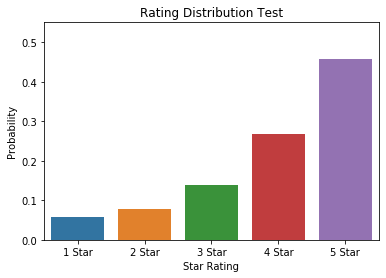

In [40]:
import seaborn as sns
stars = ['1 Star','2 Star', '3 Star', '4 Star', '5 Star']
percentage = [calculate_percentage_star(test_sample,1),calculate_percentage_star(test_sample,2),calculate_percentage_star(test_sample,3),calculate_percentage_star(test_sample,4),calculate_percentage_star(test_sample,5)]
d = {'Star Rating':stars,'Probability':percentage}
star_df_train = pd.DataFrame(d)
star_df_train

sns.barplot(x='Star Rating', y='Probability',data=star_df_train)
plt.title('Test Rating Distribution')
plt.ylim(top=0.55)

In [29]:
print(f"The number of unique reviewers in test {len(test_sample['reviewerID'].unique())}")
print(f"The number of unique movies in test {len(test_sample['movieID'].unique())}")
print(f"The distribution of overall in test: 1 star {str(calculate_percentage_star(test_sample,1))}%")
print(f"The distribution of overall in test: 2 star {str(calculate_percentage_star(test_sample,2))}%")
print(f"The distribution of overall in test: 3 star {str(calculate_percentage_star(test_sample,3))}%")
print(f"The distribution of overall in test: 4 star {str(calculate_percentage_star(test_sample,4))}%")
print(f"The distribution of overall in test: 5 star {str(calculate_percentage_star(test_sample,5))}%")

The number of unique reviewers in test 1942
The number of unique movies in test 5789
The distribution of overall in test: 1 star 0.0582%
The distribution of overall in test: 2 star 0.0783%
The distribution of overall in test: 3 star 0.13915%
The distribution of overall in test: 4 star 0.2669%
The distribution of overall in test: 5 star 0.45745%


In [9]:
#Sparsity
total_ratings = len(train_sample)

#distinct reviewerIDs
num_reviewers = len(train_sample['reviewerID'].unique())
num_movies = len(train_sample['movieID'].unique())

denom = num_reviewers*num_movies

sparsity_train = num_reviewers/denom
sparsity_train

5.88650812338121e-05

In [10]:
#Sparsity for test
total_ratings = len(test_sample)

#distinct reviewerIDs
num_reviewers = len(test_sample['reviewerID'].unique())
num_movies = len(test_sample['movieID'].unique())

denom = num_reviewers*num_movies

sparsity_test = num_reviewers/denom
sparsity_test

0.00017274140611504577

The sparsity metric is the number of cells in a matrix that contain a rating divided by the total number of values that matrix could hold given the number of users and items (movies)

In [41]:
frames = [train_sample, test_sample]

data = pd.concat(frames)
data

,reviewerID,movieID,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewer_count
0,A1127LKNR08JJK,630174411X,acwpython@juno.com,"[0, 4]",The movie was ok but it did lack a few things....,4.0,GREAT,879379200,1997-11-13,0
1,A1127LKNR08JJK,0767824571,acwpython@juno.com,"[0, 0]","This movie rules. It has humor, love, suspens...",5.0,Best Movie Ever!!!,879465600,1997-11-14,1
2,A1127LKNR08JJK,0783222068,acwpython@juno.com,"[0, 0]",HA HA HA!!! THose were the first words anyone ...,5.0,Hilarious,879465600,1997-11-14,2
3,A1127LKNR08JJK,0780022181,acwpython@juno.com,"[1, 2]",This is one of the best movies in the world. ...,5.0,This should get a 15,879897600,1997-11-19,3
4,A1127LKNR08JJK,6303094880,acwpython@juno.com,"[2, 3]",This is so funny. It has a lot of good jokes ...,5.0,Awesome,879897600,1997-11-19,4
...,...,...,...,...,...,...,...,...,...,...
19995,A3KXFQQFBPJTQE,0767836286,"Mr N Forbes-warren ""author of RESURGENCE and ...","[3, 3]","Along with ENEMY OF THE STATE, this is one of ...",5.0,Suspenseful and holds your attention!,974505600,2000-11-18,42
19996,A1345VRK5MYG7,0790744945,James L.,"[2, 8]",James Cagney stars as a pilot who agrees to &q...,3.0,"Cactuses Are Sharp, But Not the Comedy",974505600,2000-11-18,119
19997,A1345VRK5MYG7,6301442962,James L.,"[6, 7]","Oddly enough, I never saw this film as a child...",5.0,No Room For Cynics,974505600,2000-11-18,120
19998,A24DBUIAWDQXA2,B00004Z4VI,S. C. Smith,"[11, 11]",I had a smile on my face a mile wide throughou...,5.0,A smile a mile wide.,974505600,2000-11-18,9


In [42]:
print(f"The number of unique reviewers in data {len(data['reviewerID'].unique())}")
print(f"The number of unique movies in data {len(data['movieID'].unique())}")
print(f"The distribution of overall in data: 1 star {str(calculate_percentage_star(data,1))}%")
print(f"The distribution of overall in data: 2 star {str(calculate_percentage_star(data,2))}%")
print(f"The distribution of overall in data: 3 star {str(calculate_percentage_star(data,3))}%")
print(f"The distribution of overall in data: 4 star {str(calculate_percentage_star(data,4))}%")
print(f"The distribution of overall in data: 5 star {str(calculate_percentage_star(data,5))}%")

The number of unique reviewers in data 25315
The number of unique movies in data 17662
The distribution of overall in data: 1 star 0.08325833333333334%
The distribution of overall in data: 2 star 0.06955833333333333%
The distribution of overall in data: 3 star 0.111725%
The distribution of overall in data: 4 star 0.22014166666666668%
The distribution of overall in data: 5 star 0.5153166666666666%


(0.0, 0.55)

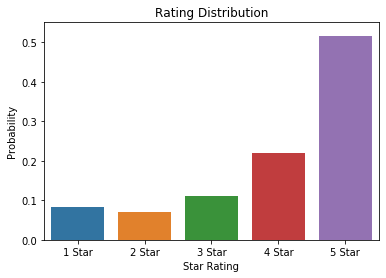

In [44]:
import seaborn as sns
stars = ['1 Star','2 Star', '3 Star', '4 Star', '5 Star']
percentage = [calculate_percentage_star(data,1),calculate_percentage_star(data,2),calculate_percentage_star(data,3),calculate_percentage_star(data,4),calculate_percentage_star(data,5)]
d = {'Star Rating':stars,'Probability':percentage}
star_df_train = pd.DataFrame(d)
star_df_train

sns.barplot(x='Star Rating', y='Probability',data=star_df_train)
plt.title('Rating Distribution')
plt.ylim(top=0.55)

In [45]:
#Sparsity for test
total_ratings = len(data)

#distinct reviewerIDs
num_reviewers = len(data['reviewerID'].unique())
num_movies = len(data['movieID'].unique())

denom = num_reviewers*num_movies

sparsity_test = num_reviewers/denom
sparsity_test

5.661872947571056e-05